In [126]:
%pylab inline

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import imageio
from cloudstor import cloudstor

Populating the interactive namespace from numpy and matplotlib


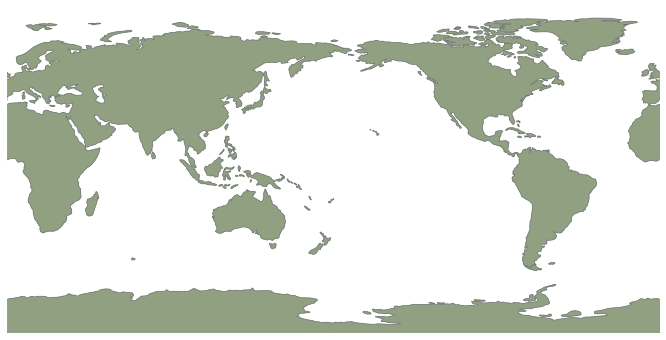

In [105]:
from cartopy.feature import LAND

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.outline_patch.set_visible(False)
ax.background_patch.set_fill(False)

ax.add_feature(LAND, facecolor="#90A080FF")
ax.coastlines(color="#707080FF", zorder=1, linewidth=0.5, alpha=1.0) 


plt.savefig("LandArea_3600x2400.tif", bbox_inches="tight", frameon=False, pad_inches=0.0, transparent=False,
            dpi=300)
plt.show()

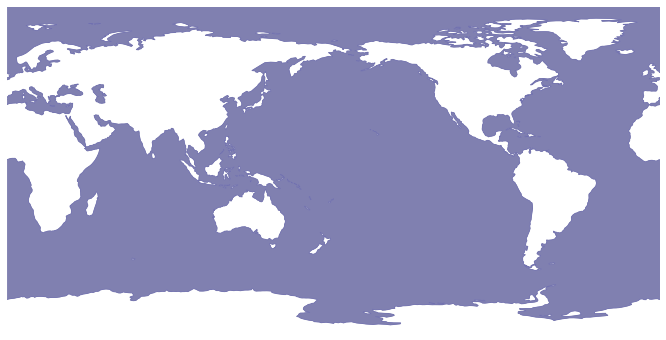

In [107]:
from cartopy.feature import OCEAN

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.outline_patch.set_visible(False)
ax.background_patch.set_fill(False)

ax.add_feature(OCEAN, facecolor="#8080B0FF")
ax.coastlines(color="#7070B0FF", zorder=1, linewidth=0.5, alpha=1.0) 


plt.savefig("OceanArea_3600x2400.tif", bbox_inches="tight", frameon=False, pad_inches=0.0, transparent=False,
            dpi=300)
plt.show()

In [58]:
teaching_data = cloudstor(url="L93TxcmtLQzcfbk", password='')

Cloudstore connection established


In [63]:
teaching_data.list()
teaching_data.download("BlueMarbleNG-TB_2004-12-01_rgb_3600x1800.TIFF", "BlueMarbleNG-TB_2004-12-01_rgb_3600x1800.TIFF")
global_marble_img = imageio.imread("BlueMarbleNG-TB_2004-12-01_rgb_3600x1800.TIFF")

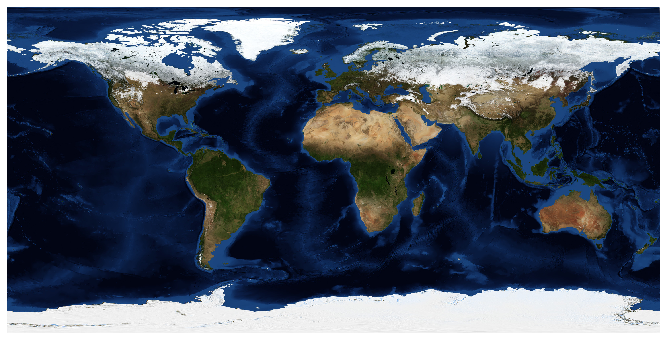

In [95]:
from cartopy.feature import LAND

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.outline_patch.set_visible(False)
ax.background_patch.set_fill(False)

plt.imshow( global_marble_img, extent=[-180,180,-90,90], zorder=0, transform=ccrs.PlateCarree()   )

plt.savefig("BlueMarble_3600x1800.tif", bbox_inches="tight", frameon=False, pad_inches=0.0, transparent=True,
            dpi=300)
plt.show()

In [99]:
teaching_data.list()
teaching_data.download("Etopo1_3600x1800.tif", "Etopo1_3600x1800.tif")
global_topo_img = imageio.imread("Etopo1_3600x1800.tif")

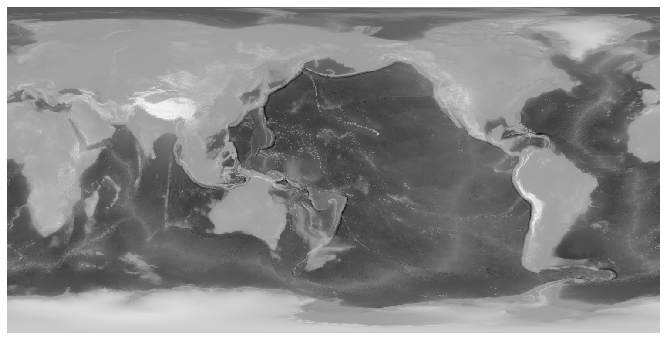

In [103]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.outline_patch.set_visible(False)
ax.background_patch.set_fill(False)

plt.imshow( global_topo_img, extent=[-180,180,-90,90], zorder=0, cmap=matplotlib.cm.gray,
            transform=ccrs.PlateCarree()   )

plt.savefig("Etopo1_grayscale_3600x1800.tif", bbox_inches="tight", frameon=False, pad_inches=0.0, transparent=True,
            dpi=300)
plt.show()


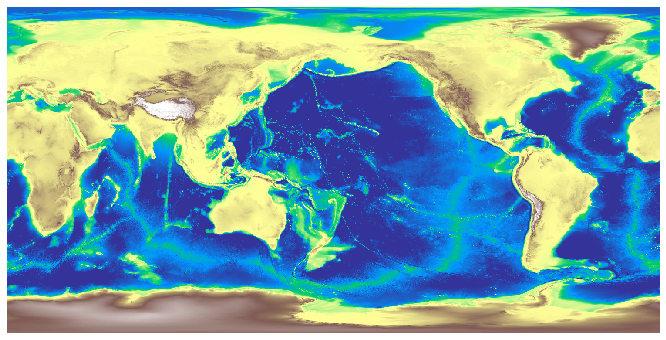

In [108]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.outline_patch.set_visible(False)
ax.background_patch.set_fill(False)

plt.imshow( global_topo_img, extent=[-180,180,-90,90], zorder=0, cmap=matplotlib.cm.terrain, vmin=-5000,vmax=5000,
            transform=ccrs.PlateCarree()   )

plt.savefig("Etopo1_terrain_3600x1800.tif", bbox_inches="tight", frameon=False, pad_inches=0.0, transparent=True,
            dpi=300)
plt.show()



In [111]:
teaching_data.list()
teaching_data.download("global_age_data.3.6.z.npz", "global_age_data.3.6.z.npz")

In [112]:
## Age Grid / contours

datasize = (1801, 3601, 3)
age_data = np.empty(datasize)

ages = np.load("global_age_data.3.6.z.npz")["ageData"]

lats = np.linspace(90, -90, datasize[0])
lons = np.linspace(-180.0,180.0, datasize[1])

arrlons,arrlats = np.meshgrid(lons, lats)

age_data[...,0] = arrlons[...]
age_data[...,1] = arrlats[...]
age_data[...,2] = ages[...]

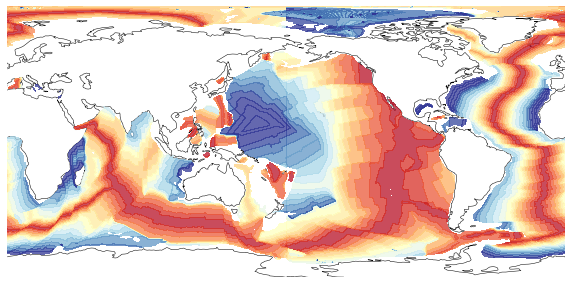

In [129]:
fig = plt.figure(figsize=(10, 10), facecolor="none", edgecolor="none")
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.outline_patch.set_visible(False)
ax.background_patch.set_fill(False)

ax.coastlines(linewidth=0.5)

ax.contourf(age_data[:,:,0], age_data[:,:,1], age_data[:,:,2], 
         levels = np.arange(0.5,250,10), vmin=0, vmax=150,
         transform=ccrs.PlateCarree(),  cmap=matplotlib.cm.RdYlBu,zorder=2, alpha=0.75)


# Want to keep the image ? Do something like this:
plt.savefig("AgeGridEarthByte_RdYlBu_3600x1800.tif", bbox_inches="tight", frameon=False, pad_inches=0.0, transparent=True,
            dpi=300)
plt.show()

In [122]:
!cp Etopo*3600*tiff ..

cp: Etopo*3600*tiff: No such file or directory


In [ ]:
3=1

In [ ]:
%%sh

## Clean up
rm Etopo1_3600x1800.tif
rm BlueMarbleNG-TB_2004-12-01_rgb_3600x1800.TIFF
rm global_age_data.3.6.z.npz